# Evaluation on the test(validation) dataset

In [1]:
from utils.miscellaneous import read_config
from sklearn.metrics import confusion_matrix

import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import utils.train_val_test_dataset_import_GC as tvt_GC
# import utils.train_val_test_dataset_import as tvt
import utils.evaluation_matrix as em
import cv2 


##  1 Parse configuration file + initializations

In [2]:
# read config files
cfg = read_config('./config.yaml')

# constants
num_classes = cfg['num_classes']
image_height = cfg['image_height']
image_width = cfg['image_width']
batch_size = cfg['batch_size']['tra']

labels = cfg['labels']

# paths
# path_test = cfg['Path']['path_test']
path_test = r"F:\Tianlong\Data\Deep_Plastic\Data\Exp3\Test 5"
# path_test = r"U:\AIMMW\Paper2_zenodo\Exp3\Test 4"

save_misclassified_images_path = cfg['Path']['save_misclassified_images_path']
# model_path = cfg['Path']['model_path']

# model_path = r"F:\Tianlong\Data\Deep_Plastic\Results\Exp2\densenet121_TL_all_lr_0.0001_DA_BR.hdf5"
# model_path = r"F:\Tianlong\Data\Deep_Plastic\Results\Model weights\densenet121_TL_all_lr_0.0001_train1.hdf5"


In [3]:
# path_test = r"F:\Tianlong\Data\Deep_Plastic\Data\Exp1\Test 1"
# path_test = r"F:\Tianlong\Data\Deep_Plastic\Data\Exp3\Test 2"

In [4]:
path_test

'F:\\Tianlong\\Data\\Deep_Plastic\\Data\\Exp3\\Test 5'

## 2 Load test dataset

In [5]:
ds_test = tvt_GC.import_dataset_test(
  path_test, image_height, image_width, batch_size)

# autotune
AUTOTUNE = tf.data.AUTOTUNE
ds_test = ds_test.cache().prefetch(buffer_size=AUTOTUNE)

Found 376 files belonging to 4 classes.


In [6]:
# ds_test

In [7]:
# Visualizing the test DATA

# for i in range(9):
#     for image, label_s in ds_test.take(1):  # capture the first batch in tf.dataset
#       ax = plt.subplot(3, 3, i+1)
#       image_i = np.uint8(255 * image[i])
#       plt.imshow(image_i)
#       plt.title(labels[label_s.numpy()[i]])
#       plt.axis('off')

In [8]:
# Visualizing the test DATA
# (2) Test dataset is generated by "train_val_test_dataset_import.py"

# plt.figure(figsize=(10, 10))
# for images, labels in ds_test.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1) 
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.axis("off")

## 3 Load model

In [9]:
model_path = r"F:\Tianlong\Data\Deep_Plastic\Results\Exp1\Model_no_rescale_layer\10_times\Misclassified\SqueezeNet_TL_all_lr_0.0001_2.hdf5"
model = tf.keras.models.load_model(model_path)
# model.summary()

## 4 Test

### 4.1 Statistics output

In [10]:
# statistics output when evaluated on the test data
 
loss, acc = model.evaluate(ds_test)
print("Model, accuracy: {:5.2f}%".format(100 * acc))

24/24 [==============================] - 3s 12ms/step - loss: 2.6644 - accuracy: 0.6090
Model, accuracy: 60.90%


In [11]:
em.cnn_statistics(model,ds_test)

Print classification report on validation(test) dataset
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        61
           1       0.39      0.59      0.47        71
           2       0.59      0.65      0.62       121
           3       0.85      0.68      0.76       123

    accuracy                           0.61       376
   macro avg       0.62      0.58      0.59       376
weighted avg       0.65      0.61      0.62       376



In [ ]:
# output test accuaracy of models in one folder

# srs_dir = r"F:\Tianlong\Data\Deep_Plastic\Results\Exp3\test"
# files = os.listdir(srs_dir)
# for file in files:
#     print(str(file))
#     model = tf.keras.models.load_model(srs_dir + '/' + str(file))
#     loss, acc = model.evaluate(ds_test)
#     print("Model, accuracy: {:5.2f}%".format(100 * acc))

### 4.2 Confusion matrix 

Confusion matrix, without normalization
[[24 37  0  0]
 [13 42 16  0]
 [ 0 27 79 15]
 [ 0  1 38 84]]


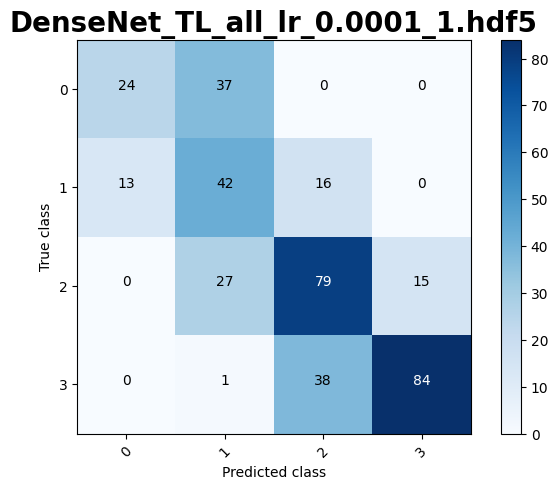

In [12]:
em.ConfusionMatrix('DenseNet_TL_all_lr_0.0001_1.hdf5', model, ds_test, num_classes)


### 4.3 Show and save Misclassified examples

In [13]:
y_true = np.concatenate([y for x, y in ds_test], axis=0)
y_pred = model.predict(ds_test).argmax(axis=1)
x_test = np.concatenate([x for x, y in ds_test], axis=0)
# x_test = x_test/255.0
misclassified_idx = np.where(y_pred != y_true)[0]
print("Number of misclassified images: ", misclassified_idx.size)


Number of misclassified images:  147


In [ ]:
# misclassified_idx

In [14]:
# Save misclassified images in one folder
save_misclassified_images_path=r"F:\Tianlong\Data\Deep_Plastic\Results\Exp1\Model_no_rescale_layer\10_times\Misclassified\Misclassification_on_Test5-1"

for i in misclassified_idx:
    fig = plt.figure(figsize=(2.24,2.24)) 
    plt.axis('off')
    plt.grid(False)
    x_test[i] = np.uint8(255 * x_test[i])
    plt.tight_layout(pad=0) # make the image full image (no padding)
    plt.imshow(x_test[i].astype(np.uint8), cmap='gray')
    # plt.title("%s pred as: %s" % (labels[y_true[i]], labels[y_pred[i]]))
    fig_name = labels[y_true[i]] + "_pred_as_" + labels[y_pred[i]] + str(i) + ".jpg"
    fig_path = os.path.join(save_misclassified_images_path,fig_name)
    fig.savefig(fig_path)
    plt.close() # close the figure, to prevent the figure shows up in Notebook

    

In [ ]:
# Show one random misclassified example
i = np.random.choice(misclassified_idx)
fig = plt.figure(figsize=(10,8))
plt.grid(False)
plt.imshow(x_test[i].astype(np.uint8), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_true[i]], labels[y_pred[i]]));

In [ ]:
# Show one specific misclassified example
fig = plt.figure(figsize=(10,8))
plt.grid(False)
plt.imshow(x_test[6].astype(np.uint8), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_true[6]], labels[y_pred[0]]));

# 5.1 Predict new images with labels (4 classes)

if the images are misclassified, they will be saved at another directory.

In [ ]:
# load a folder with new images
# folder_path_new_images = r"U:\AIMMW\Paper2_zenodo\Exp1\Test 1"
# folder_path_new_images = r"U:\AIMMW\Paper2_zenodo\Exp3\test"
folder_path_new_images = r"U:\AIMMW\Paper2_zenodo\Exp3\Test 5"

# save_predicted_images_path = r"C:\Users\tjian\Desktop\Paper 2\Result\Misclassification\Exp1\Misclassification_on_Test1"
# save_predicted_images_path = r"C:\Users\tjian\Desktop\Paper 2\Result\Misclassification\Exp3\Misclassification_on_Test4_1"
save_predicted_images_path = r"C:\Users\tjian\Desktop\Paper 2\Result\Misclassification\Exp3\Misclassification_on_Test5"

In [ ]:
folders = os.listdir(folder_path_new_images)

for folder in folders:
    
    if folder == "0 - No Plastic":
        ture_label = "No"
    if folder == "1 - Little Plastic":
        ture_label = "Little"
    if folder == "2 - Moderate Plastic":
        ture_label = "Moderate"
    if folder == "3 - Lot Plastic":
        ture_label = "Lot"

    
    dir = folder_path_new_images + '/' + str(folder)
    files = os.listdir(dir)
    for file in files:
    #   print(str(file))
      path_new_images = os.path.join(dir, file)
      img = tf.keras.utils.load_img(path_new_images, target_size=(image_height, image_width))
      img_array = tf.keras.utils.img_to_array(img)
      img_array = img_array/255
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      # score = tf.nn.softmax(predictions[0])

      class_names = ["No", "Little", "Moderate", "Lot"]

      # find the index of the class with maximum score
      pred = np.argmax(predictions, axis=-1)
      # print the label of the class with maximum score
    
      print(class_names[pred[0]])

    
    #   img = cv2.imread(path_new_images) 
    #   os.chdir(save_predicted_images_path) 
    #   filename = ture_label + "_as_" + class_names[pred[0]] + "_" + file
    #   cv2.imwrite(filename, img)
        
        # fig_name = labels[y_true[i]] + "_pred_as_" + labels[y_pred[i]] + str(i) + ".jpg"
        # fig_path = os.path.join(save_misclassified_images_path,fig_name)
        # fig.savefig(fig_path)


    # print(
    #   "This image most likely belongs to {} with a {:.2f} percent confidence."
    #   .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )


# 5.2 Predict new images without labels (binary)

if the images belong to "plastic" class, rather than "no plastic" class, they will be saved at another directory.

In [ ]:
# load a folder with new images
folder_path_new_images = r"U:\AIMMW\Paper2_zenodo\Exp1\Test 1"

save_predicted_images_path = r"C:\Users\tjian\Desktop\Paper 2\Result\Misclassification\Exp1"


In [ ]:
files = os.listdir(folder_path_new_images)
for file in files:
    print(str(file))
    path_new_images = os.path.join(folder_path_new_images, file)
    img = tf.keras.utils.load_img(path_new_images, target_size=(image_height, image_width))
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = img_array/255
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    # score = tf.nn.softmax(predictions[0])

    class_names = ["No plastic", "Plastic"]

    # find the index of the class with maximum score
    pred = np.argmax(predictions, axis=-1)
    # print the label of the class with maximum score
    print(class_names[pred])
    print(class_names[pred[0]])
    
    if class_names[pred[0]] == "Plastic":
    
        img = cv2.imread(path_new_images) 
        os.chdir(save_predicted_images_path) 

        filename = file + '_plastic.jpg'
        cv2.imwrite(filename, img) 
        
        # fig_name = labels[y_true[i]] + "_pred_as_" + labels[y_pred[i]] + str(i) + ".jpg"
        # fig_path = os.path.join(save_misclassified_images_path,fig_name)
        # fig.savefig(fig_path)


    # print(
    #   "This image most likely belongs to {} with a {:.2f} percent confidence."
    #   .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )


# Majority Vote

In [ ]:
num_classes=4
y_true = np.concatenate([y for x, y in ds_val], axis=0)
y_pred_squeeze = model_squeeze.predict(ds_val).argmax(axis=1)
y_pred_dense = model_dense.predict(ds_val).argmax(axis=1)
y_pred_incept = model_incept.predict(ds_val).argmax(axis=1)
major = [0]*len(y_pred_incept)

In [ ]:
data = {'squeezenet': y_pred_squeeze, 'densenet121': y_pred_dense, 'inceptionv3': y_pred_incept, 'm_vote': major }

In [ ]:
df = pd.DataFrame(data)

In [ ]:
for i in range(0, len(data['squeezenet'])):
    if (data['squeezenet'][i] != data['densenet121'][i]) and (data['squeezenet'][i] != data['inceptionv3'][i]) and (data['densenet121'][i] != data['inceptionv3'][i]):
        df['m_vote'][i] = data['squeezenet'][i]
    elif (data['squeezenet'][i] == data['densenet121'][i]):
        df['m_vote'][i] = data['squeezenet'][i]
    elif (data['squeezenet'][i] == data['inceptionv3'][i]):
        df['m_vote'][i] = data['squeezenet'][i]
    elif (data['densenet121'][i] == data['inceptionv3'][i]):
        df['m_vote'][i] = data['densenet121'][i]
    else:
        df['m_vote'][i] = data['squeezenet'][i]

In [ ]:
y_pred = np.array(df['m_vote'])

In [ ]:
model = tf.keras.models.load_model(r'C:\Users\Andre\Desktop\Research paper\from_scratch_weights_with_DA\dense_net_DAHV.hdf5')

In [ ]:
y_pred = model.predict(ds_val).argmax(axis=1)

In [ ]:
print(f'Print classification report on validation(test) dataset')
print(f'-----'*10)
print(classification_report(y_true, y_pred))

  # we quickly create a decent looking CM for many classes using pandas and seaborn
print(f'\nPlot confusion matrix on validation(test) dataset')
print(f'-----'*10)
df_cm = pd.DataFrame(confusion_matrix(y_true,y_pred))
f, ax = plt.subplots(1,figsize = (10,10))
sns.heatmap(df_cm, annot=True, annot_kws={"fontsize":12}, ax= ax, vmax=50, cbar=False, cmap='Blues', fmt='d') # we use this value of vmax to emphasize misclassifications
ax.set_title('SqueezeNet - TRAIN: Train 3, Test: Test 4', fontsize=16, fontweight='bold')
ax.set_ylabel('True class');
ax.set_xlabel('Predicted class');

# Majority vote with weights

In [ ]:
y_pred_squeeze = model_squeeze.predict(ds_val)
y_pred_dense = model_dense.predict(ds_val)
y_pred_incept = model_incept.predict(ds_val)

In [ ]:
for i in range(len(y_pred_dense)):
    for j in range(len(y_pred_dense[i])):
        y_pred_dense[i][j] = (0.83*y_pred_incept[i][j]) + (0.86*y_pred_dense[i][j]) + (0.89*y_pred_squeeze[i][j])

In [ ]:
y_pred = np.argmax(y_pred_dense, axis = 1)

In [ ]:
print(f'Print classification report on validation(test) dataset')
print(f'-----'*10)
print(classification_report(y_val, y_pred))


print(f'\nPlot confusion matrix on validation(test) dataset')
print(f'-----'*10)
df_cm = pd.DataFrame(confusion_matrix(y_val,y_pred))
f, ax = plt.subplots(1,figsize = (10,10))
sns.heatmap(df_cm, annot=True, annot_kws={"fontsize":12}, ax= ax, vmax=50, cbar=False, cmap='Blues', fmt='d') # we use this value of vmax to emphasize misclassifications
ax.set_title('Majority Vote - TRAIN: 2.7m/0 deg, VAL: 2.7m/0 deg', fontsize=16, fontweight='bold')
ax.set_ylabel('True class');
ax.set_xlabel('Predicted class');